<a href="https://colab.research.google.com/github/nidhibudhraja/IOT/blob/master/HUMAN_ACTIVITY_CHANGE_POINT_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [0]:
# Reading the CSV files
acc = pd.read_csv("https://raw.githubusercontent.com/nidhibudhraja/Raw-Data/master/LSM6DSL%20Accelerometer.csv")

gyr = pd.read_csv("https://raw.githubusercontent.com/nidhibudhraja/Raw-Data/master/LSM6DSL%20Gyroscope.csv")


In [0]:
#Naming the columns
columns=["Timestamp","X","Y","Z","Activity"]

In [0]:
#Adding Headings
acc_df = np.asarray(acc)
acc_df = pd.DataFrame(data= acc_df , columns = columns)
acc_df.astype({"X":np.int64, "Y":np.int64, "Z":np.int64})
acc_df

,Timestamp,X,Y,Z,Activity
0,1581774876109,-1.97043,6.16746,7.37414,WALKING
1,1581774876129,-1.8579,6.1507,7.53934,WALKING
2,1581774876150,-1.64003,6.1124,7.74524,WALKING
3,1581774876169,-1.31681,6.03099,7.72848,WALKING
4,1581774876189,-1.02711,5.97114,7.53455,WALKING
...,...,...,...,...,...
48316,1581775840225,-2.95205,4.72376,9.50259,STANDING
48317,1581775840245,-1.9393,4.51307,9.15064,STANDING
48318,1581775840265,-1.1995,4.13239,8.9184,STANDING
48319,1581775840293,-0.641646,3.98635,8.3821,STANDING


In [0]:
#Adding Headings
gyr_df = np.asarray(gyr)
gyr_df = pd.DataFrame(data= gyr_df , columns = columns)
gyr_df.astype({"X":np.int64, "Y":np.int64, "Z":np.int64})
gyr_df

,Timestamp,X,Y,Z,Activity
0,1581774876109,0.171653,-0.00610865,0.00671952,WALKING
1,1581774876129,0.171653,-0.00610865,0.00671952,WALKING
2,1581774876150,0.171653,-0.00610865,0.00671952,WALKING
3,1581774876169,-0.0629191,-0.328035,0.050091,WALKING
4,1581774876189,-0.022602,-0.287107,0.067806,WALKING
...,...,...,...,...,...
48316,1581775840225,-0.612698,0.102014,-0.0788016,STANDING
48317,1581775840245,-0.453262,-0.269392,-0.0470366,STANDING
48318,1581775840266,-0.178984,-0.679893,-0.0989602,STANDING
48319,1581775840293,0.231518,-1.03236,-0.204029,STANDING


In [51]:
#desc data
acc_df2=acc_df.groupby('Activity')

acc_df2.describe()


Timestamp                        ... Magnitude                
              count unique            top  ...    unique        top freq
Activity                                   ...                          
JOGGING        4128   3902  1581775476134  ...    4128.0   6.258464  1.0
RUNNING         763    755  1581775548450  ...     763.0  20.945459  1.0
SITTING        1297   1196  1581774887922  ...    1296.0   9.672399  2.0
STANDING        647    624  1581774905914  ...     647.0   9.595829  1.0
STEP_DOWN      3668   3446  1581775569015  ...    3668.0   8.859328  1.0
STEP_UP        4279   3990  1581775008382  ...    4279.0   8.122399  1.0
WALKING       33539  31535  1581775097401  ...   33539.0   8.886075  1.0

[7 rows x 20 columns]

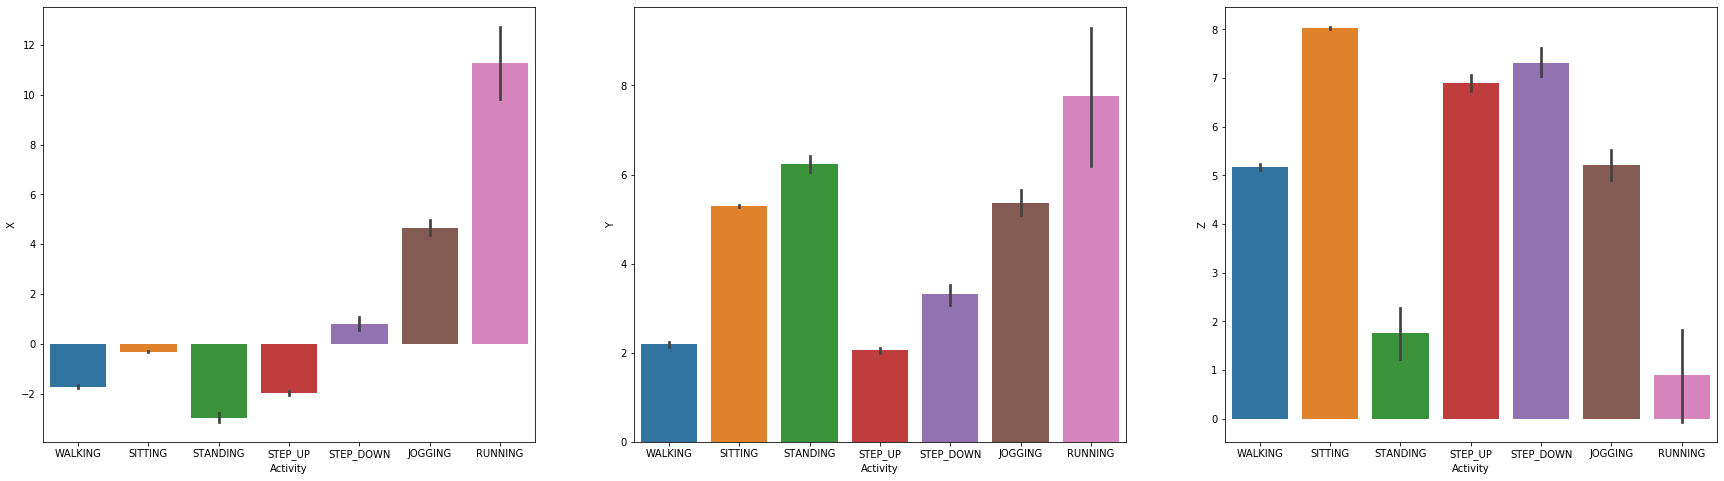

In [48]:
import seaborn as sns
fig_dims = (30, 8)

fig, axs = plt.subplots(figsize=fig_dims, ncols=3)
sns.barplot(x=acc_df['Activity'],y=acc_df['X'],data=acc_df, ax=axs[0])
sns.barplot(x=acc_df['Activity'],y=acc_df['Y'],data=acc_df, ax=axs[1])
sns.barplot(x=acc_df['Activity'],y=acc_df['Z'],data=acc_df, ax=axs[2])

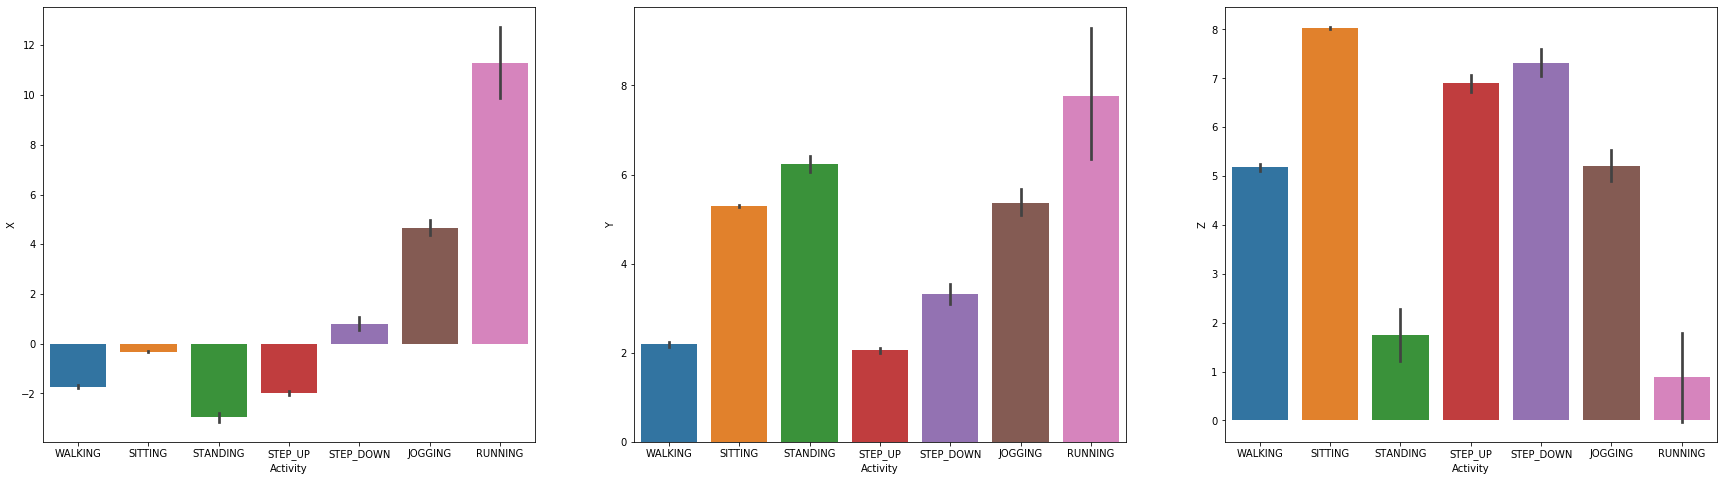

In [49]:
import seaborn as sns
fig_dims = (30, 8)

fig, axs = plt.subplots(figsize=fig_dims, ncols=3)
sns.barplot(x=gyr_df['Activity'],y=acc_df['X'],data=gyr_df, ax=axs[0])
sns.barplot(x=gyr_df['Activity'],y=acc_df['Y'],data=gyr_df, ax=axs[1])
sns.barplot(x=gyr_df['Activity'],y=acc_df['Z'],data=gyr_df, ax=axs[2])

In [0]:
# Plotting the time series data for Accelerometer

#plt.subplot(3, 1, 1)
#plt.plot(acc_df['Timestamp'],acc_df['X'])
#colors=['red','green','blue','yellow','orange','violet','indigo']
#plt.scatter(acc_df['Timestamp'],acc_df['X'],color=colors,label=acc_df['Activity'])
#plt.scatter(acc_df['Timestamp'],acc_df['X'], c=acc_df.Activity.unique, cmap=matplotlib.colors.ListedColormap(colors))

#plt.subplot(3, 1, 2)
#plt.plot(acc_df['Timestamp'],acc_df['Y'],'g')
#plt.subplot(3, 1, 3)
#plt.plot(acc_df['Timestamp'],acc_df['Z'],'r')

In [0]:
# Plotting the time series data for Gyroscope
#plt.figure(figsize=(30,10))
#plt.subplot(1, 3, 1)
#plt.plot(gyr_df['Timestamp'],gyr_df['X'])
#plt.subplot(1, 3, 2)
#plt.plot(gyr_df['Timestamp'],gyr_df['Y'],'g')
#lt.subplot(1, 3, 3)
#plt.plot(gyr_df['Timestamp'],gyr_df['Z'],'r')

In [38]:
#Calculating magnitude
import math
acc_df['Magnitude']= (( acc_df['X'] * acc_df['X'] ) + ( acc_df['Y'] * acc_df['Y'] ) + ( acc_df['Z'] * acc_df['Z'] ) )**0.5
acc_df

,Timestamp,X,Y,Z,Activity,Magnitude
0,1581774876109,-1.97043,6.16746,7.37414,WALKING,9.81316
1,1581774876129,-1.8579,6.1507,7.53934,WALKING,9.90579
2,1581774876150,-1.64003,6.1124,7.74524,WALKING,10.002
3,1581774876169,-1.31681,6.03099,7.72848,WALKING,9.89122
4,1581774876189,-1.02711,5.97114,7.53455,WALKING,9.66845
...,...,...,...,...,...,...
48316,1581775840225,-2.95205,4.72376,9.50259,STANDING,11.0149
48317,1581775840245,-1.9393,4.51307,9.15064,STANDING,10.3857
48318,1581775840265,-1.1995,4.13239,8.9184,STANDING,9.90219
48319,1581775840293,-0.641646,3.98635,8.3821,STANDING,9.30388


In [0]:
#Calculating magnitude
import math
gyr_df['Magnitude']= (( gyr_df['X'] * gyr_df['X'] ) + ( gyr_df['Y'] * gyr_df['Y'] ) + ( gyr_df['Z'] * gyr_df['Z'] ) )**0.5
gyr_df

,Timestamp,X,Y,Z,Activity,Magnitude
0,1581774876109,0.171653,-0.00610865,0.00671952,WALKING,0.171893
1,1581774876129,0.171653,-0.00610865,0.00671952,WALKING,0.171893
2,1581774876150,0.171653,-0.00610865,0.00671952,WALKING,0.171893
3,1581774876169,-0.0629191,-0.328035,0.050091,WALKING,0.337749
4,1581774876189,-0.022602,-0.287107,0.067806,WALKING,0.295869
...,...,...,...,...,...,...
48316,1581775840225,-0.612698,0.102014,-0.0788016,STANDING,0.626111
48317,1581775840245,-0.453262,-0.269392,-0.0470366,STANDING,0.529368
48318,1581775840266,-0.178984,-0.679893,-0.0989602,STANDING,0.709988
48319,1581775840293,0.231518,-1.03236,-0.204029,STANDING,1.0775


In [55]:
#Sampling and Shuffling data 
acc_df.sample(frac=0.5)

,Timestamp,X,Y,Z,Activity,Magnitude
40282,1581775679920,-8.9591,-3.30639,-0.818817,WALKING,9.58479
13357,1581775142592,-0.0981623,2.70066,8.64307,WALKING,9.05571
22525,1581775325481,0.342371,2.79882,14.0181,WALKING,14.2988
25347,1581775381779,1.83635,2.07098,8.33661,WALKING,8.78409
22388,1581775322743,-0.342371,3.36864,12.3637,WALKING,12.8189
...,...,...,...,...,...,...
47131,1581775816649,-4.81235,4.75728,-7.89608,WALKING,10.399
13523,1581775145909,1.99198,2.58574,9.39964,WALKING,9.95023
42247,1581775719194,-4.24492,4.90811,-4.21858,WALKING,7.73986
16073,1581775196785,1.59214,2.48997,8.40604,WALKING,8.91047


In [68]:
#Diff
from sklearn.preprocessing import LabelEncoder
label_encoder_y = LabelEncoder()
acc_df['Activity'] = label_encoder_y.fit_transform(acc_df['Activity'])

acc_df.diff()
acc_df.dropna()

,Timestamp,X,Y,Z,Activity,Magnitude
0,1581774876109,-1.97043,6.16746,7.37414,6,9.81316
1,1581774876129,-1.8579,6.1507,7.53934,6,9.90579
2,1581774876150,-1.64003,6.1124,7.74524,6,10.002
3,1581774876169,-1.31681,6.03099,7.72848,6,9.89122
4,1581774876189,-1.02711,5.97114,7.53455,6,9.66845
...,...,...,...,...,...,...
48316,1581775840225,-2.95205,4.72376,9.50259,3,11.0149
48317,1581775840245,-1.9393,4.51307,9.15064,3,10.3857
48318,1581775840265,-1.1995,4.13239,8.9184,3,9.90219
48319,1581775840293,-0.641646,3.98635,8.3821,3,9.30388


In [0]:
acc_df['Activity']=acc_df['Activity'].astype(bool).astype(int)

In [73]:
acc_df

,Timestamp,X,Y,Z,Activity,Magnitude
0,1581774876109,-1.97043,6.16746,7.37414,1,9.81316
1,1581774876129,-1.8579,6.1507,7.53934,1,9.90579
2,1581774876150,-1.64003,6.1124,7.74524,1,10.002
3,1581774876169,-1.31681,6.03099,7.72848,1,9.89122
4,1581774876189,-1.02711,5.97114,7.53455,1,9.66845
...,...,...,...,...,...,...
48316,1581775840225,-2.95205,4.72376,9.50259,1,11.0149
48317,1581775840245,-1.9393,4.51307,9.15064,1,10.3857
48318,1581775840265,-1.1995,4.13239,8.9184,1,9.90219
48319,1581775840293,-0.641646,3.98635,8.3821,1,9.30388


In [74]:
acc_df['Activity'].value_counts()

1    44193
0     4128
Name: Activity, dtype: int64

In [0]:
X = acc_df[['X','Y','Z']]
y = acc_df['Activity']

In [79]:
X

,X,Y,Z
0,-1.97043,6.16746,7.37414
1,-1.8579,6.1507,7.53934
2,-1.64003,6.1124,7.74524
3,-1.31681,6.03099,7.72848
4,-1.02711,5.97114,7.53455
...,...,...,...
48316,-2.95205,4.72376,9.50259
48317,-1.9393,4.51307,9.15064
48318,-1.1995,4.13239,8.9184
48319,-0.641646,3.98635,8.3821


In [0]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.2, random_state = 1,shuffle = True)

In [82]:
#modal using sklearn Logistic regressions
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model3 = LogisticRegression()
model3.fit(train_X,train_Y)
prediction3=model3.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))
accuracy_Logistic = metrics.accuracy_score(prediction3,test_Y)

The accuracy of the Logistic Regression is 0.9125711329539575
